In [ ]:
!pip install cdlib

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter
import matplotlib
import collections
import json
import itertools
from cdlib import algorithms
from collections import defaultdict
from cdlib import evaluation
#matplotlib.use('TkAgg')

In [ ]:
def box_plot(data, title):
    plot_list = []
    labels = []
    for k, v in data.items():
        plot_list.append(v["list"])
        labels.append(v["name"])
    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    plt.boxplot(plot_list,labels=labels)
    #plt.boxplot(x)
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xticks(fontsize=fontsize, alpha=1)
    plt.xlabel('Algorithms', fontsize=fontsize)
    plt.ylabel(title, fontsize=fontsize)
    plt.title(title+" Box Plot", fontsize=fontsize)
    #plt.title(name + " in 24 hours", fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.yscale("log")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [ ]:
def scatter_plot(sizes, title):
    fig = plt.figure(figsize=(16,8), dpi= 150)
    ax = fig.add_subplot(111)

   
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha=0.5)
        labels.append(i[2])
    
    
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Size", fontsize=fontsize)
    plt.ylabel("Internal Edge Density", fontsize=fontsize)
    plt.title(title + " Scatter Plot", fontsize=fontsize)
    plt.legend(labels,fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    plt.yscale("linear")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [ ]:
G = nx.read_edgelist("edges.csv", delimiter=',', create_using=nx.DiGraph)

### K-Clique

In [ ]:
kclique_coms = algorithms.kclique(G.to_undirected(), k=3)

In [ ]:
kclique_evaluation_pd = pd.DataFrame(columns=["index", "min", "max", "mean", "std"])

In [ ]:
kclique_avg_internal_deg = np.array(evaluation.average_internal_degree(G,kclique_coms, summary=False))
kclique_internal_edge_density = np.array(evaluation.internal_edge_density(G,kclique_coms, summary=False))
kclique_size = np.array(evaluation.size(G,kclique_coms, summary=False))
kclique_edges_inside = np.array(evaluation.edges_inside(G,kclique_coms, summary=False))
kclique_cut_ratio = np.array(evaluation.cut_ratio(G,kclique_coms, summary=False))
kclique_conductance = np.array(evaluation.conductance(G,kclique_coms, summary=False))
kclique_modularity = np.array(evaluation.link_modularity(G,kclique_coms, summary=False))

In [ ]:
kclique_modularity

array([None, None, 0.046160412255374386, None], dtype=object)

In [ ]:
kclique_evaluation_pd.loc[0] = ("Average Internal Degree", kclique_avg_internal_deg.min(), 
                         kclique_avg_internal_deg.max(), 
                         kclique_avg_internal_deg.mean(), 
                         kclique_avg_internal_deg.std())
kclique_evaluation_pd.loc[1] = ("Internal Edge Density", kclique_internal_edge_density.min(), 
                         kclique_internal_edge_density.max(), 
                         kclique_internal_edge_density.mean(), 
                         kclique_internal_edge_density.std())
kclique_evaluation_pd.loc[2] = ("Size", kclique_size.min(), 
                         kclique_size.max(), 
                         kclique_size.mean(), 
                         kclique_size.std())
kclique_evaluation_pd.loc[3] = ("Edges Inside", kclique_edges_inside.min(), 
                         kclique_edges_inside.max(), 
                         kclique_edges_inside.mean(), 
                         kclique_edges_inside.std())
kclique_evaluation_pd.loc[4] = ("Cut Ratio", kclique_cut_ratio.min(), 
                         kclique_cut_ratio.max(), 
                         kclique_cut_ratio.mean(), 
                         kclique_cut_ratio.std())
kclique_evaluation_pd.loc[5] = ("Conductance", kclique_conductance.min(), 
                         kclique_conductance.max(), 
                         kclique_conductance.mean(), 
                         kclique_conductance.std())

In [ ]:
print("Number of Communities: %d"%len(kclique_coms.communities))

Number of Communities: 1377


In [ ]:
nodes_l = []
for i in kclique_coms.communities:
    nodes_l += i
nodes_l = list(set(nodes_l))
print("Number of nodes involved: %d"%len(nodes_l))

Number of nodes involved: 13836


In [ ]:
kclique_evaluation_pd

,index,min,max,mean,std
0,Average Internal Degree,2.000000,9.047619,3.528477,1.334758
1,Internal Edge Density,0.000228,0.500000,0.252643,0.081758
2,Size,3.000000,9770.000000,12.501816,263.078289
3,Edges Inside,3.000000,43562.000000,43.075527,1173.277806
4,Cut Ratio,0.000000,0.000222,0.000169,0.000044
5,Conductance,0.000000,0.666667,0.473653,0.142204


### Label Propagation

In [ ]:
label_coms = algorithms.label_propagation(G.to_undirected())

In [ ]:
label_evaluation_pd = pd.DataFrame(columns=["index", "min", "max", "mean", "std"])

In [ ]:
label_avg_internal_deg = np.array(evaluation.average_internal_degree(G,label_coms, summary=False))
label_internal_edge_density = np.array(evaluation.internal_edge_density(G,label_coms, summary=False))
label_size = np.array(evaluation.size(G,label_coms, summary=False))
label_edges_inside = np.array(evaluation.edges_inside(G,label_coms, summary=False))
label_cut_ratio = np.array(evaluation.cut_ratio(G,label_coms, summary=False))
label_conductance = np.array(evaluation.conductance(G,label_coms, summary=False))
label_modularity = np.array(evaluation.link_modularity(G,label_coms, summary=False))

In [ ]:
label_modularity

array([None, None, 0.04099411635600966, None], dtype=object)

In [ ]:
label_evaluation_pd.loc[0] = ("Average Internal Degree", label_avg_internal_deg.min(), 
                         label_avg_internal_deg.max(), 
                         label_avg_internal_deg.mean(), 
                         label_avg_internal_deg.std())
label_evaluation_pd.loc[1] = ("Internal Edge Density", label_internal_edge_density.min(), 
                         label_internal_edge_density.max(), 
                         label_internal_edge_density.mean(), 
                         label_internal_edge_density.std())
label_evaluation_pd.loc[2] = ("Size", label_size.min(), 
                         label_size.max(), 
                         label_size.mean(), 
                         label_size.std())
label_evaluation_pd.loc[3] = ("Edges Inside", label_edges_inside.min(), 
                         label_edges_inside.max(), 
                         label_edges_inside.mean(), 
                         label_edges_inside.std())
label_evaluation_pd.loc[4] = ("Cut Ratio", label_cut_ratio.min(), 
                         label_cut_ratio.max(), 
                         label_cut_ratio.mean(), 
                         label_cut_ratio.std())
label_evaluation_pd.loc[5] = ("Conductance", label_conductance.min(), 
                         label_conductance.max(), 
                         label_conductance.mean(), 
                         label_conductance.std())

In [ ]:
print("Number of Communities: %d"%len(label_coms.communities))

Number of Communities: 1727


In [ ]:
nodes_l = []
for i in label_coms.communities:
    nodes_l += i
nodes_l = list(set(nodes_l))
print("Number of nodes involved: %d"%len(nodes_l))

Number of nodes involved: 18002


In [ ]:
label_evaluation_pd

,index,min,max,mean,std
0,Average Internal Degree,1.0,9.142857,2.789288,1.741221
1,Internal Edge Density,0.0,0.500000,0.178203,0.098301
2,Size,1.0,1195.000000,10.423856,38.333146
3,Edges Inside,1.0,3685.000000,23.200926,114.401738
4,Cut Ratio,0.0,0.000278,0.000092,0.000051
5,Conductance,0.0,0.818182,0.384038,0.166759


### Louvain

In [ ]:
louvain_coms = algorithms.louvain(G.to_undirected(), resolution=1., randomize=False)

In [ ]:
louvain_evaluation_pd = pd.DataFrame(columns=["index", "min", "max", "mean", "std"])

In [ ]:
louvain_avg_internal_deg = np.array(evaluation.average_internal_degree(G,louvain_coms, summary=False))
louvain_internal_edge_density = np.array(evaluation.internal_edge_density(G,louvain_coms, summary=False))
louvain_size = np.array(evaluation.size(G,louvain_coms, summary=False))
louvain_edges_inside = np.array(evaluation.edges_inside(G,louvain_coms, summary=False))
louvain_cut_ratio = np.array(evaluation.cut_ratio(G,louvain_coms, summary=False))
louvain_conductance = np.array(evaluation.conductance(G,louvain_coms, summary=False))
louvain_modularity = np.array(evaluation.link_modularity(G,louvain_coms, summary=False))

In [ ]:
louvain_modularity

array([None, None, 0.05333453722825014, None], dtype=object)

In [ ]:
louvain_evaluation_pd.loc[0] = ("Average Internal Degree", louvain_avg_internal_deg.min(), 
                         louvain_avg_internal_deg.max(), 
                         louvain_avg_internal_deg.mean(), 
                         louvain_avg_internal_deg.std())
louvain_evaluation_pd.loc[1] = ("Internal Edge Density", louvain_internal_edge_density.min(), 
                         louvain_internal_edge_density.max(), 
                         louvain_internal_edge_density.mean(), 
                         louvain_internal_edge_density.std())
louvain_evaluation_pd.loc[2] = ("Size", louvain_size.min(), 
                         louvain_size.max(), 
                         louvain_size.mean(), 
                         louvain_size.std())
louvain_evaluation_pd.loc[3] = ("Edges Inside", louvain_edges_inside.min(), 
                         louvain_edges_inside.max(), 
                         louvain_edges_inside.mean(), 
                         louvain_edges_inside.std())
louvain_evaluation_pd.loc[4] = ("Cut Ratio", louvain_cut_ratio.min(), 
                         louvain_cut_ratio.max(), 
                         louvain_cut_ratio.mean(), 
                         louvain_cut_ratio.std())
louvain_evaluation_pd.loc[5] = ("Conductance", louvain_conductance.min(), 
                         louvain_conductance.max(), 
                         louvain_conductance.mean(), 
                         louvain_conductance.std())

In [ ]:
print("Number of Communities: %d"%len(louvain_coms.communities))

Number of Communities: 36


In [ ]:
nodes_l = []
for i in louvain_coms.communities:
    nodes_l += i
    nodes_l = list(set(nodes_l))
print("Number of nodes involved: %d"%len(nodes_l))

Number of nodes involved: 18002


In [ ]:
louvain_evaluation_pd

,index,min,max,mean,std
0,Average Internal Degree,1.666667,7.411765,5.332908,1.263177
1,Internal Edge Density,0.000844,0.333333,0.021430,0.056516
2,Size,6.000000,1868.000000,500.055556,474.332979
3,Edges Inside,5.000000,5890.000000,1447.777778,1431.272377
4,Cut Ratio,0.000000,0.000082,0.000054,0.000021
5,Conductance,0.000000,0.213757,0.145329,0.055363


### Demon/Angel

In [ ]:
demon_coms = algorithms.demon(G.to_undirected(), min_com_size=3, epsilon=0.25)

In [ ]:
demon_evaluation_pd = pd.DataFrame(columns=["index", "min", "max", "mean", "std"])

In [ ]:
demon_avg_internal_deg = np.array(evaluation.average_internal_degree(G,demon_coms, summary=False))
demon_internal_edge_density = np.array(evaluation.internal_edge_density(G,demon_coms, summary=False))
demon_size = np.array(evaluation.size(G,demon_coms, summary=False))
demon_edges_inside = np.array(evaluation.edges_inside(G,demon_coms, summary=False))
demon_cut_ratio = np.array(evaluation.cut_ratio(G,demon_coms, summary=False))
demon_conductance = np.array(evaluation.conductance(G,demon_coms, summary=False))
demon_modularity = np.array(evaluation.link_modularity(G,demon_coms, summary=False))

In [ ]:
demon_modularity

array([None, None, 0.04283989893109655, None], dtype=object)

In [ ]:
demon_evaluation_pd.loc[0] = ("Average Internal Degree", demon_avg_internal_deg.min(), 
                         demon_avg_internal_deg.max(), 
                         demon_avg_internal_deg.mean(), 
                         demon_avg_internal_deg.std())
demon_evaluation_pd.loc[1] = ("Internal Edge Density", demon_internal_edge_density.min(), 
                         demon_internal_edge_density.max(), 
                         demon_internal_edge_density.mean(), 
                         demon_internal_edge_density.std())
demon_evaluation_pd.loc[2] = ("Size", demon_size.min(), 
                         demon_size.max(), 
                         demon_size.mean(), 
                         demon_size.std())
demon_evaluation_pd.loc[3] = ("Edges Inside", demon_edges_inside.min(), 
                         demon_edges_inside.max(), 
                         demon_edges_inside.mean(), 
                         demon_edges_inside.std())
demon_evaluation_pd.loc[4] = ("Cut Ratio", demon_cut_ratio.min(), 
                         demon_cut_ratio.max(), 
                         demon_cut_ratio.mean(), 
                         demon_cut_ratio.std())
demon_evaluation_pd.loc[5] = ("Conductance", demon_conductance.min(), 
                         demon_conductance.max(), 
                         demon_conductance.mean(), 
                         demon_conductance.std())

In [ ]:
print("Number of Communities: %d"%len(demon_coms.communities))
nodes_l = []
for i in demon_coms.communities:
    nodes_l += i
nodes_l = list(set(nodes_l))
print("Number of nodes involved: %d"%len(nodes_l))

Number of Communities: 849
Number of nodes involved: 13329


In [ ]:
demon_evaluation_pd

,index,min,max,mean,std
0,Average Internal Degree,2.500000,8.333333,5.484750,0.938138
1,Internal Edge Density,0.002992,0.416667,0.065854,0.070491
2,Size,4.000000,577.000000,50.732627,50.267580
3,Edges Inside,5.000000,1989.000000,149.570082,164.878983
4,Cut Ratio,0.000000,0.000189,0.000117,0.000026
5,Conductance,0.000000,0.515152,0.281900,0.076956


In [ ]:
size_data = {
    "louvain":{
        "name":"Louvain",
        "list":louvain_size
    },
    "kclique":{
        "name":"K-Clique",
        "list":kclique_size
    },
    "label propagation":{
        "name":"Label Propagation",
        "list":label_size
    },
    "demon/angel":{
        "name":"Demon/Angel",
        "list":demon_size
    }
}

### Plots

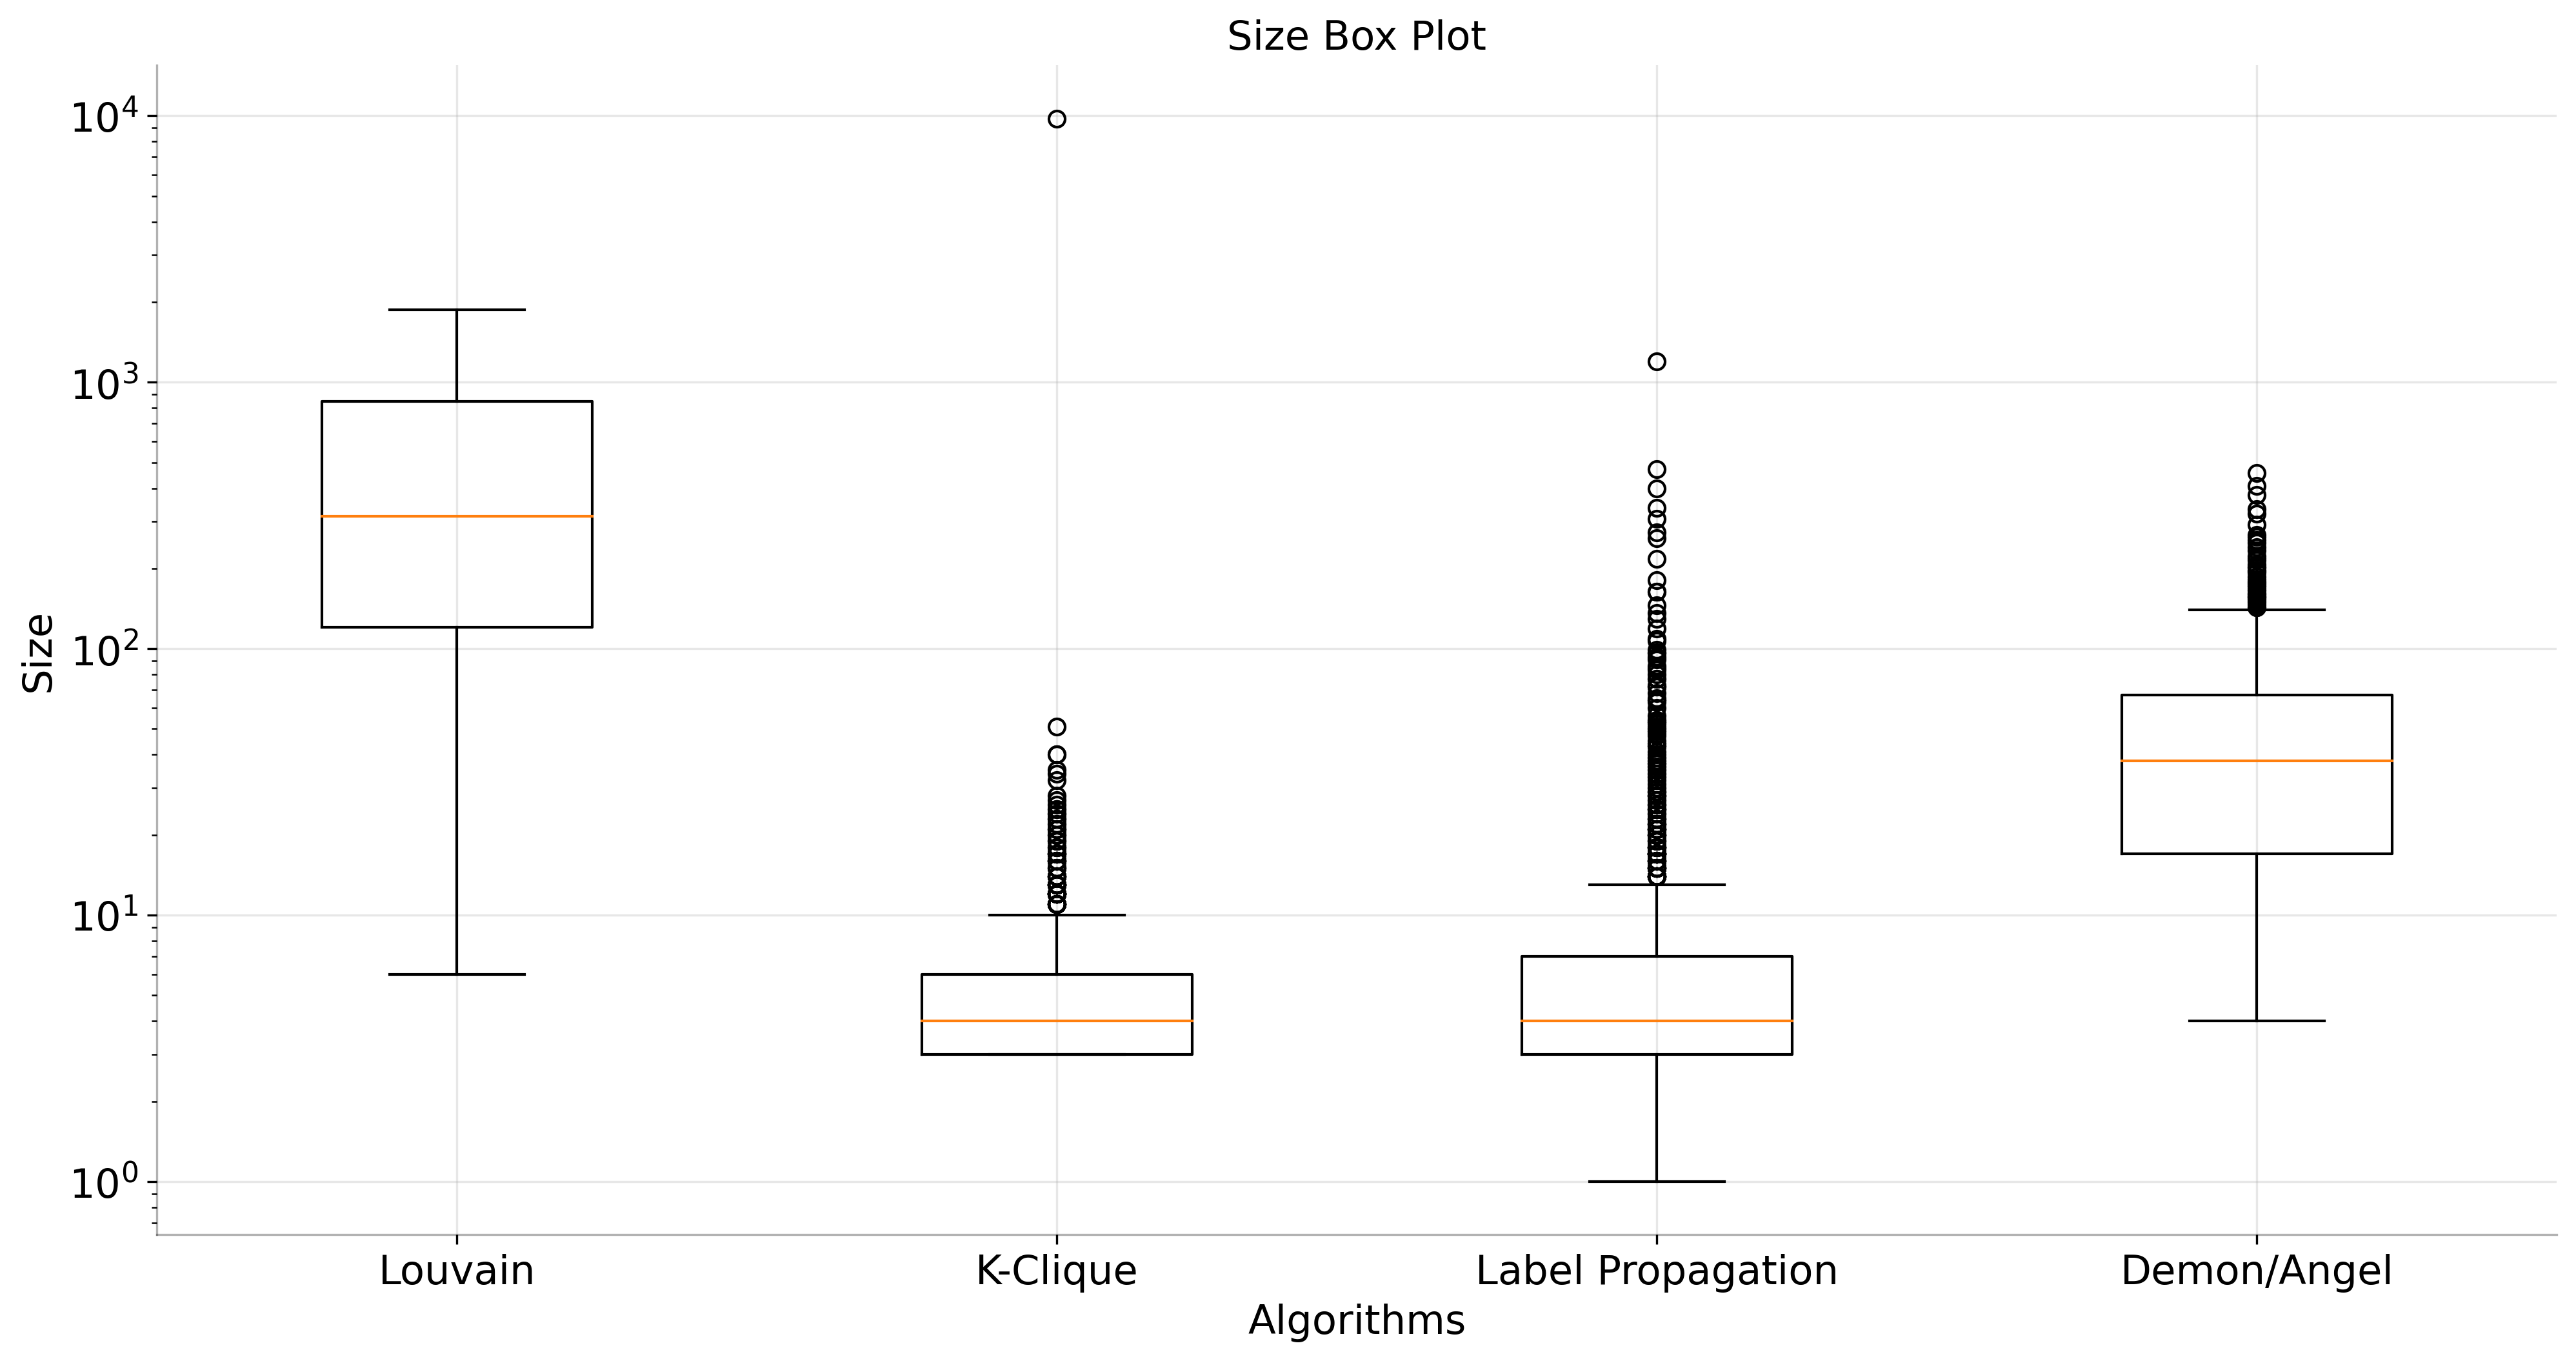

In [ ]:
box_plot(size_data, "Size")

In [ ]:
edge_density_kclique_label = [(label_size, label_internal_edge_density, "Label Propagation"),
                       (kclique_size, kclique_internal_edge_density, "K-Clique")]

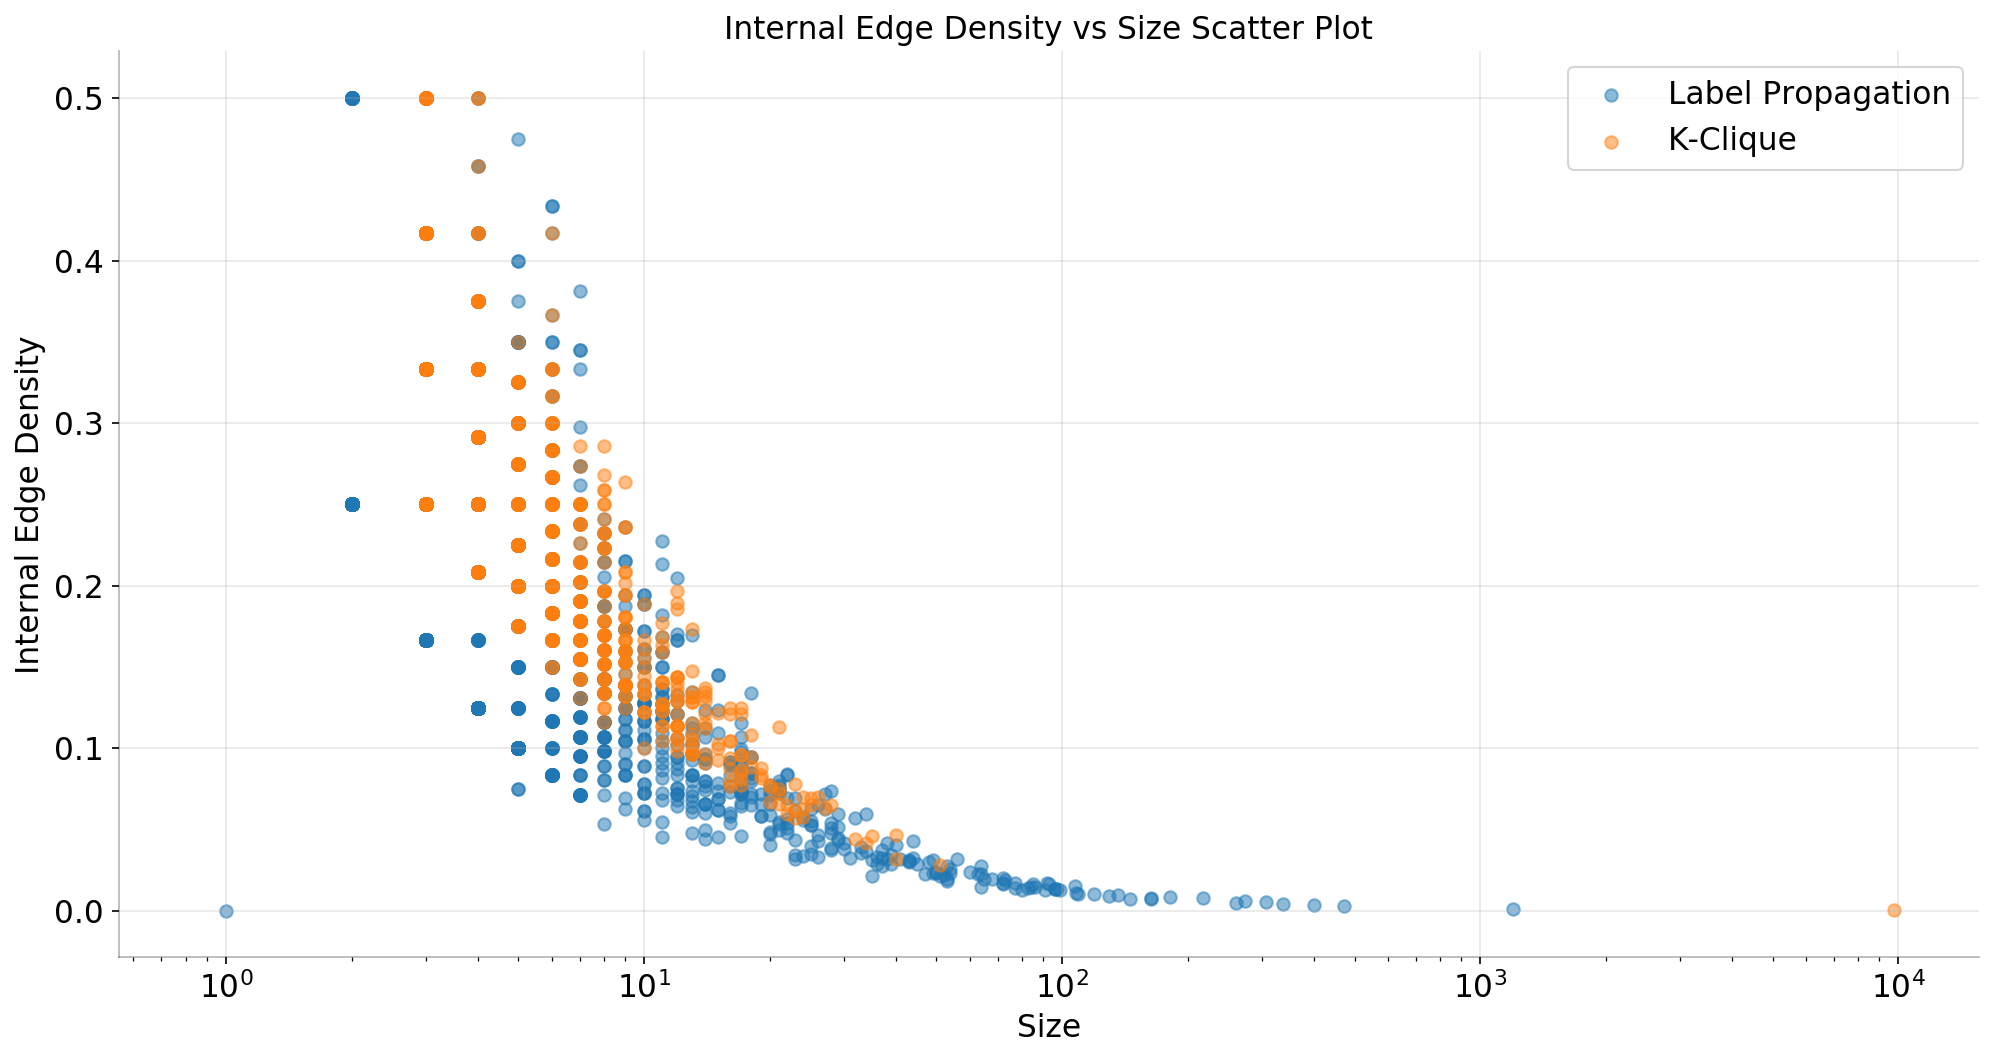

In [ ]:
scatter_plot(edge_density_kclique_label, "Internal Edge Density vs Size")

In [ ]:
edge_density_louvain_demon = [(demon_size, demon_internal_edge_density, "Demon/Angel"),
                       (louvain_size, louvain_internal_edge_density, "Louvain")]

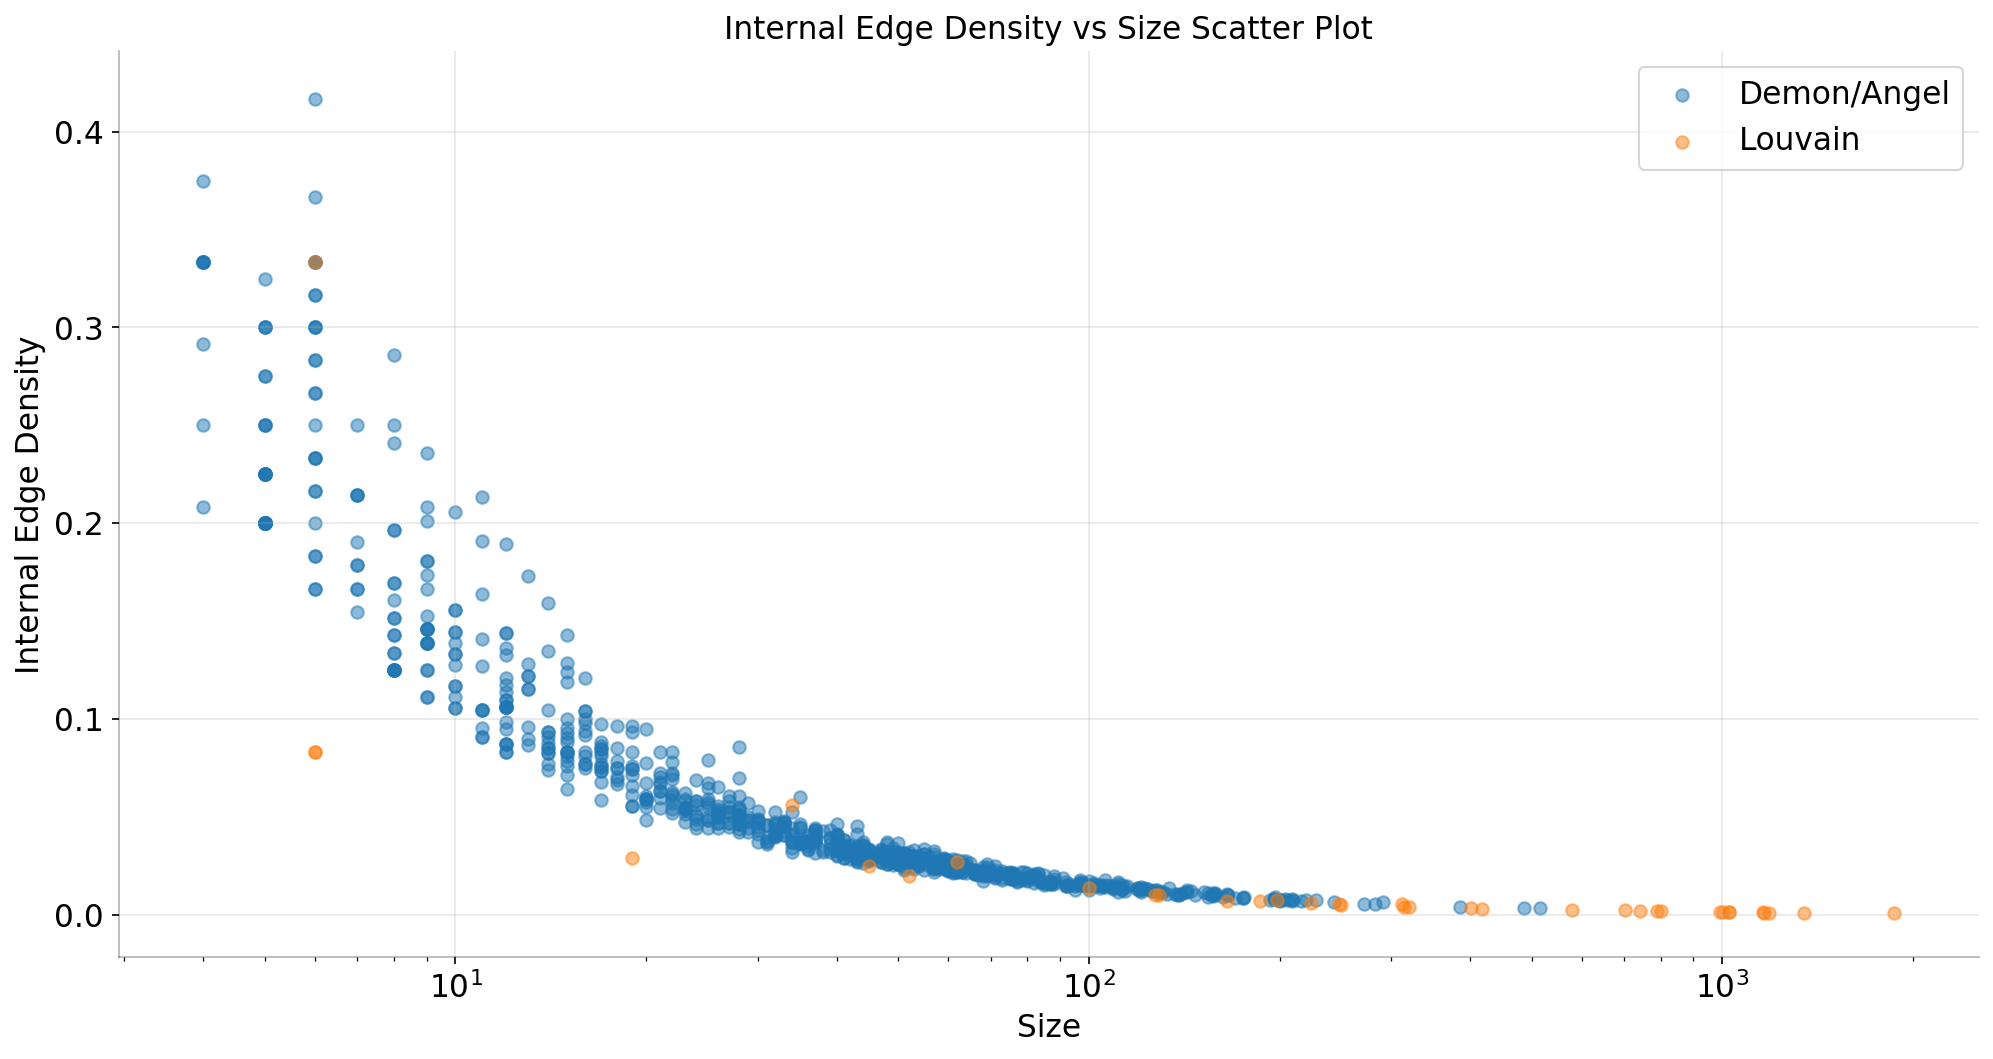

In [ ]:
scatter_plot(edge_density_louvain_demon, "Internal Edge Density vs Size")

In [ ]:
edge_density_all= [(label_size, label_internal_edge_density, "Label Propagation"),
                       (kclique_size, kclique_internal_edge_density, "K-Clique"),
                       (demon_size, demon_internal_edge_density, "Demon/Angel"),
                       (louvain_size, louvain_internal_edge_density, "Louvain")]

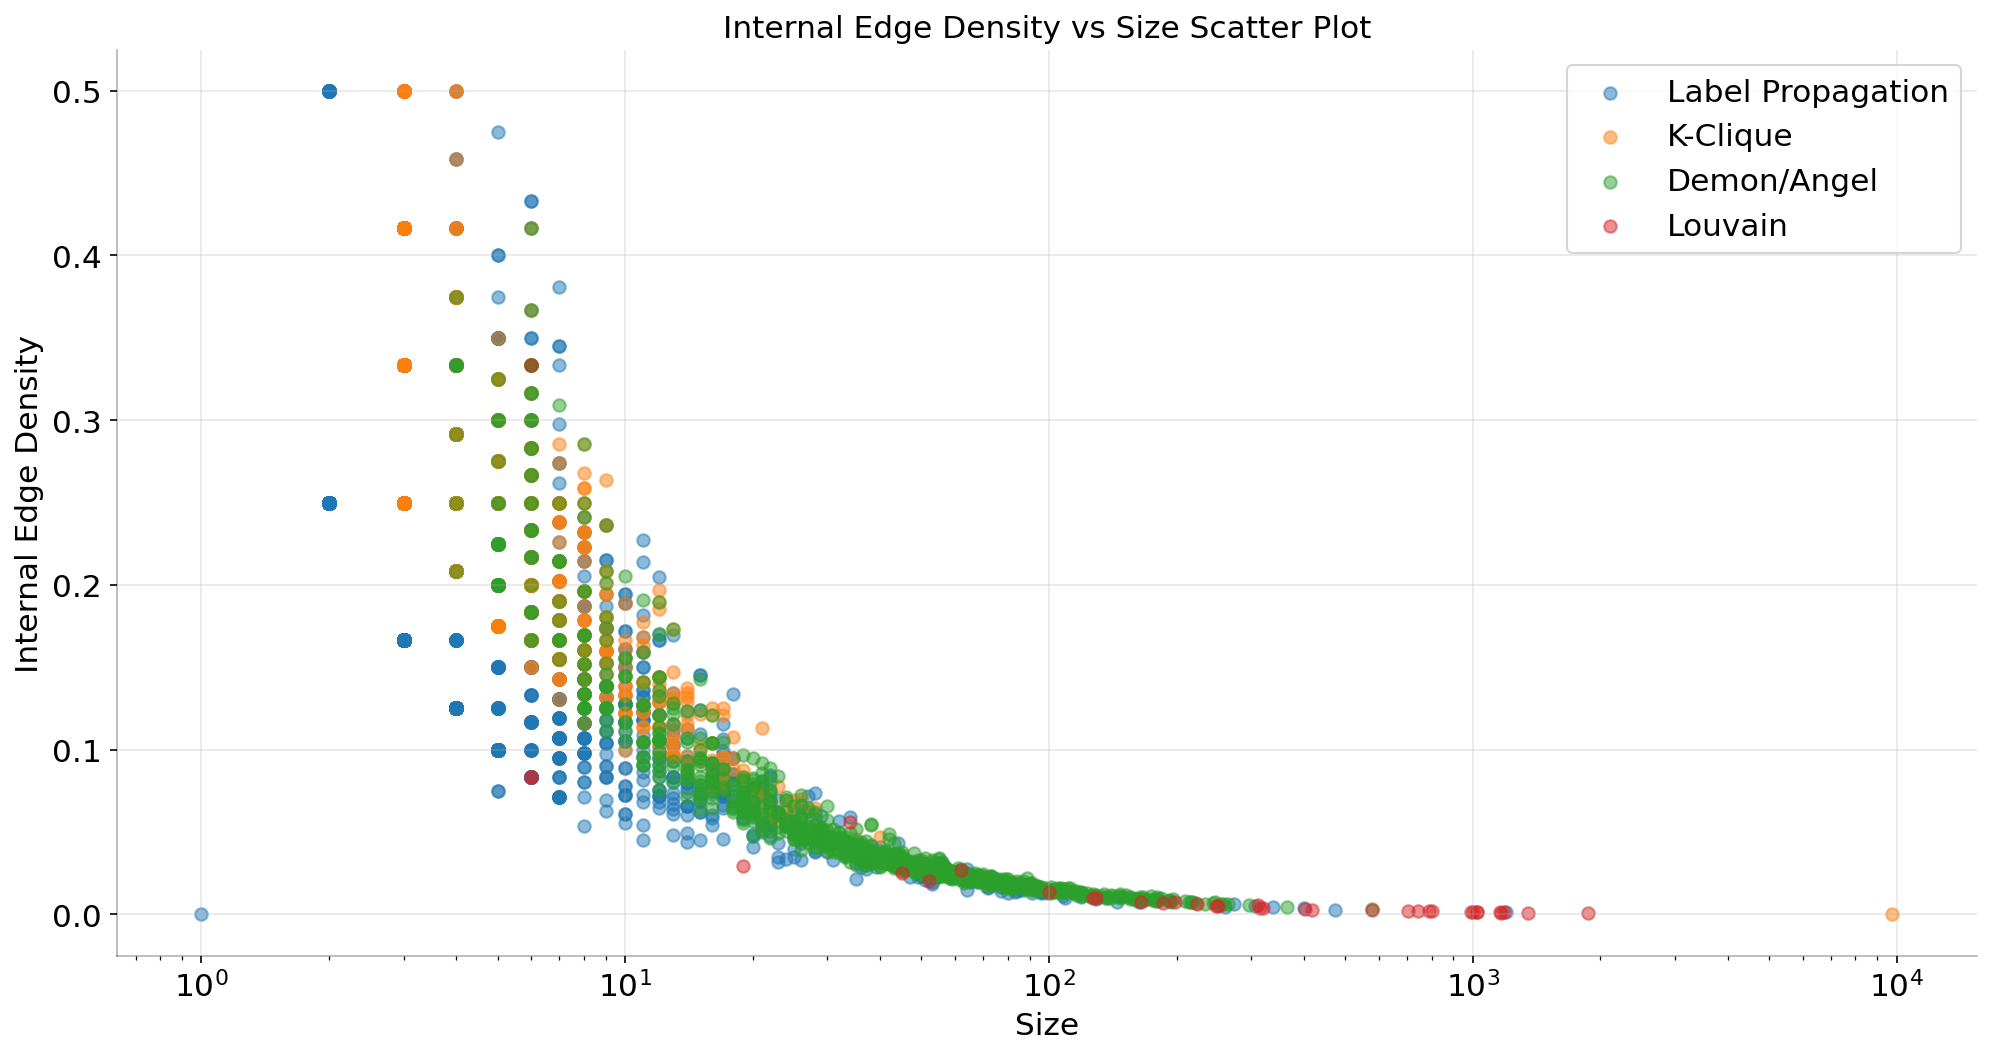

In [ ]:
scatter_plot(edge_density_all, "Internal Edge Density vs Size")

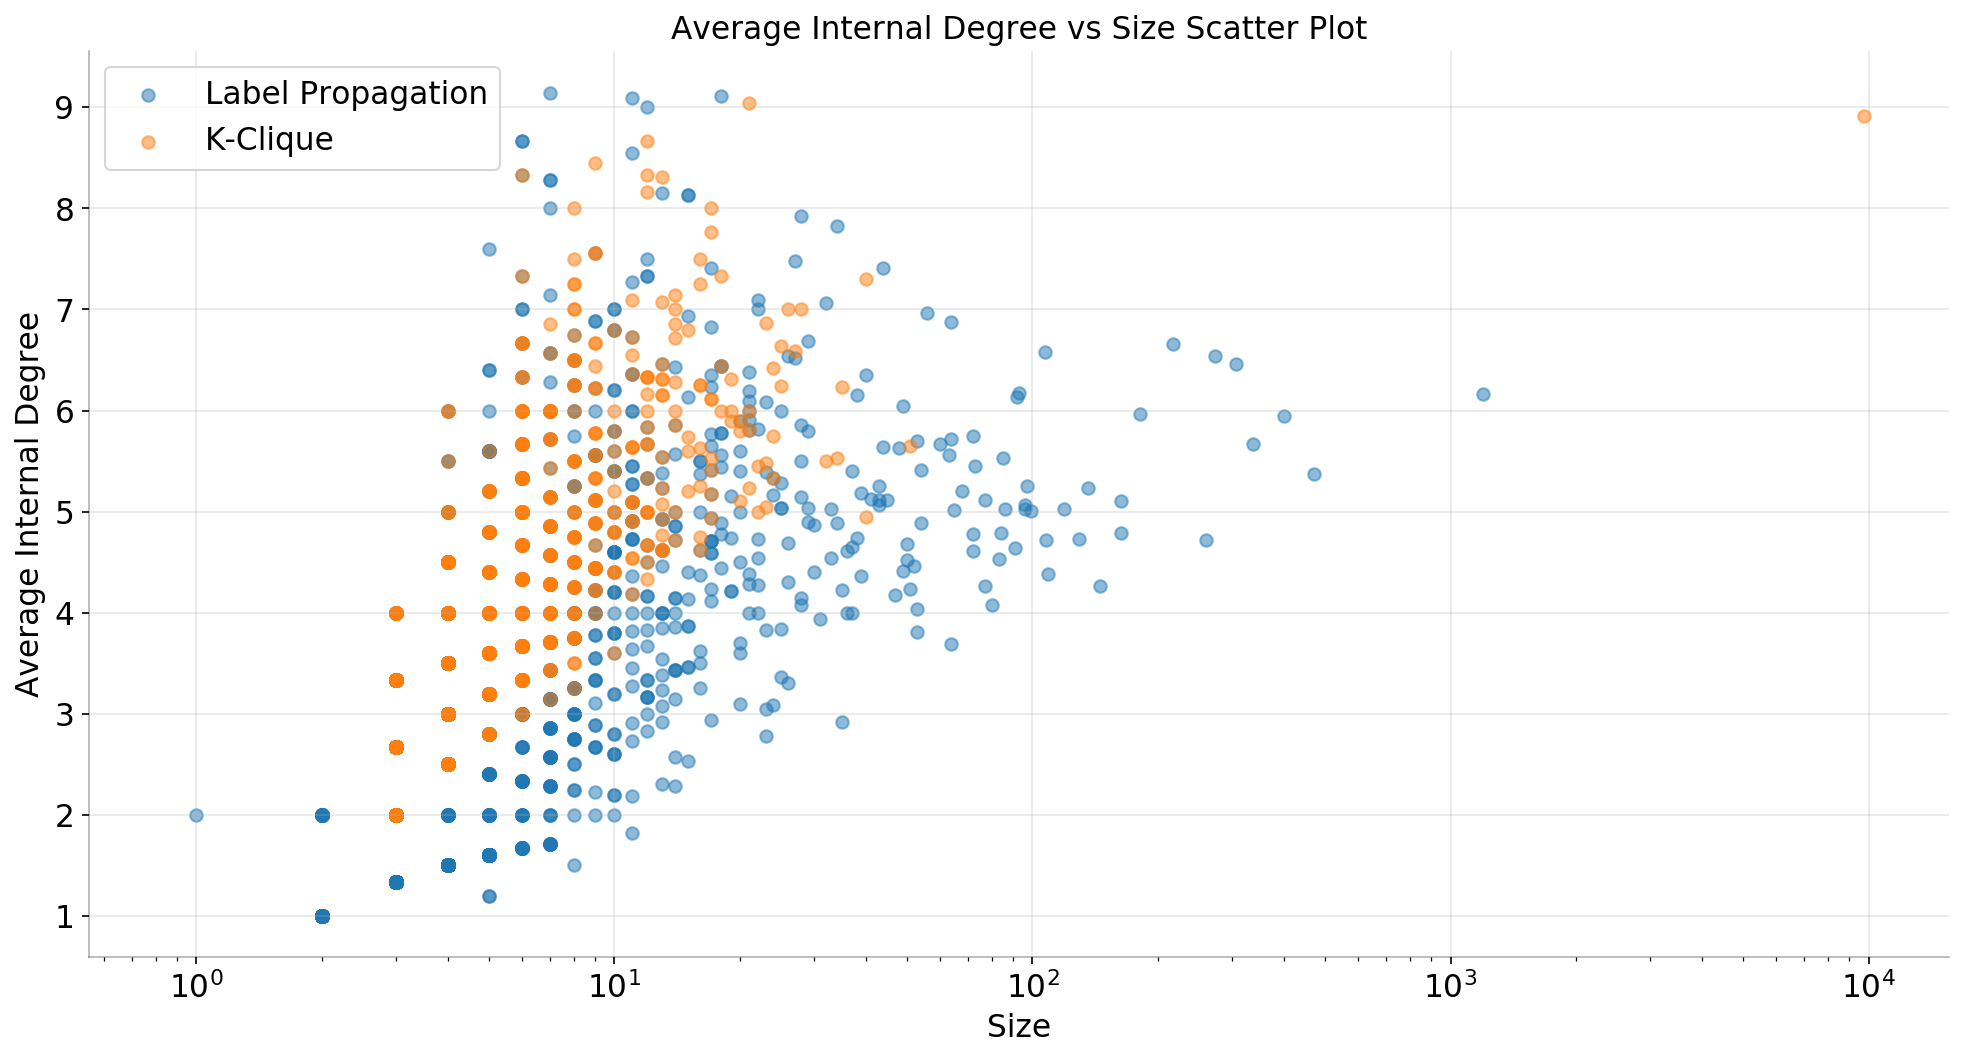

In [ ]:
avg_internal_deg_kclique_label = [(label_size, label_avg_internal_deg, "Label Propagation"),
                       (kclique_size, kclique_avg_internal_deg, "K-Clique")]
scatter_plot(avg_internal_deg_kclique_label, "Average Internal Degree vs Size")

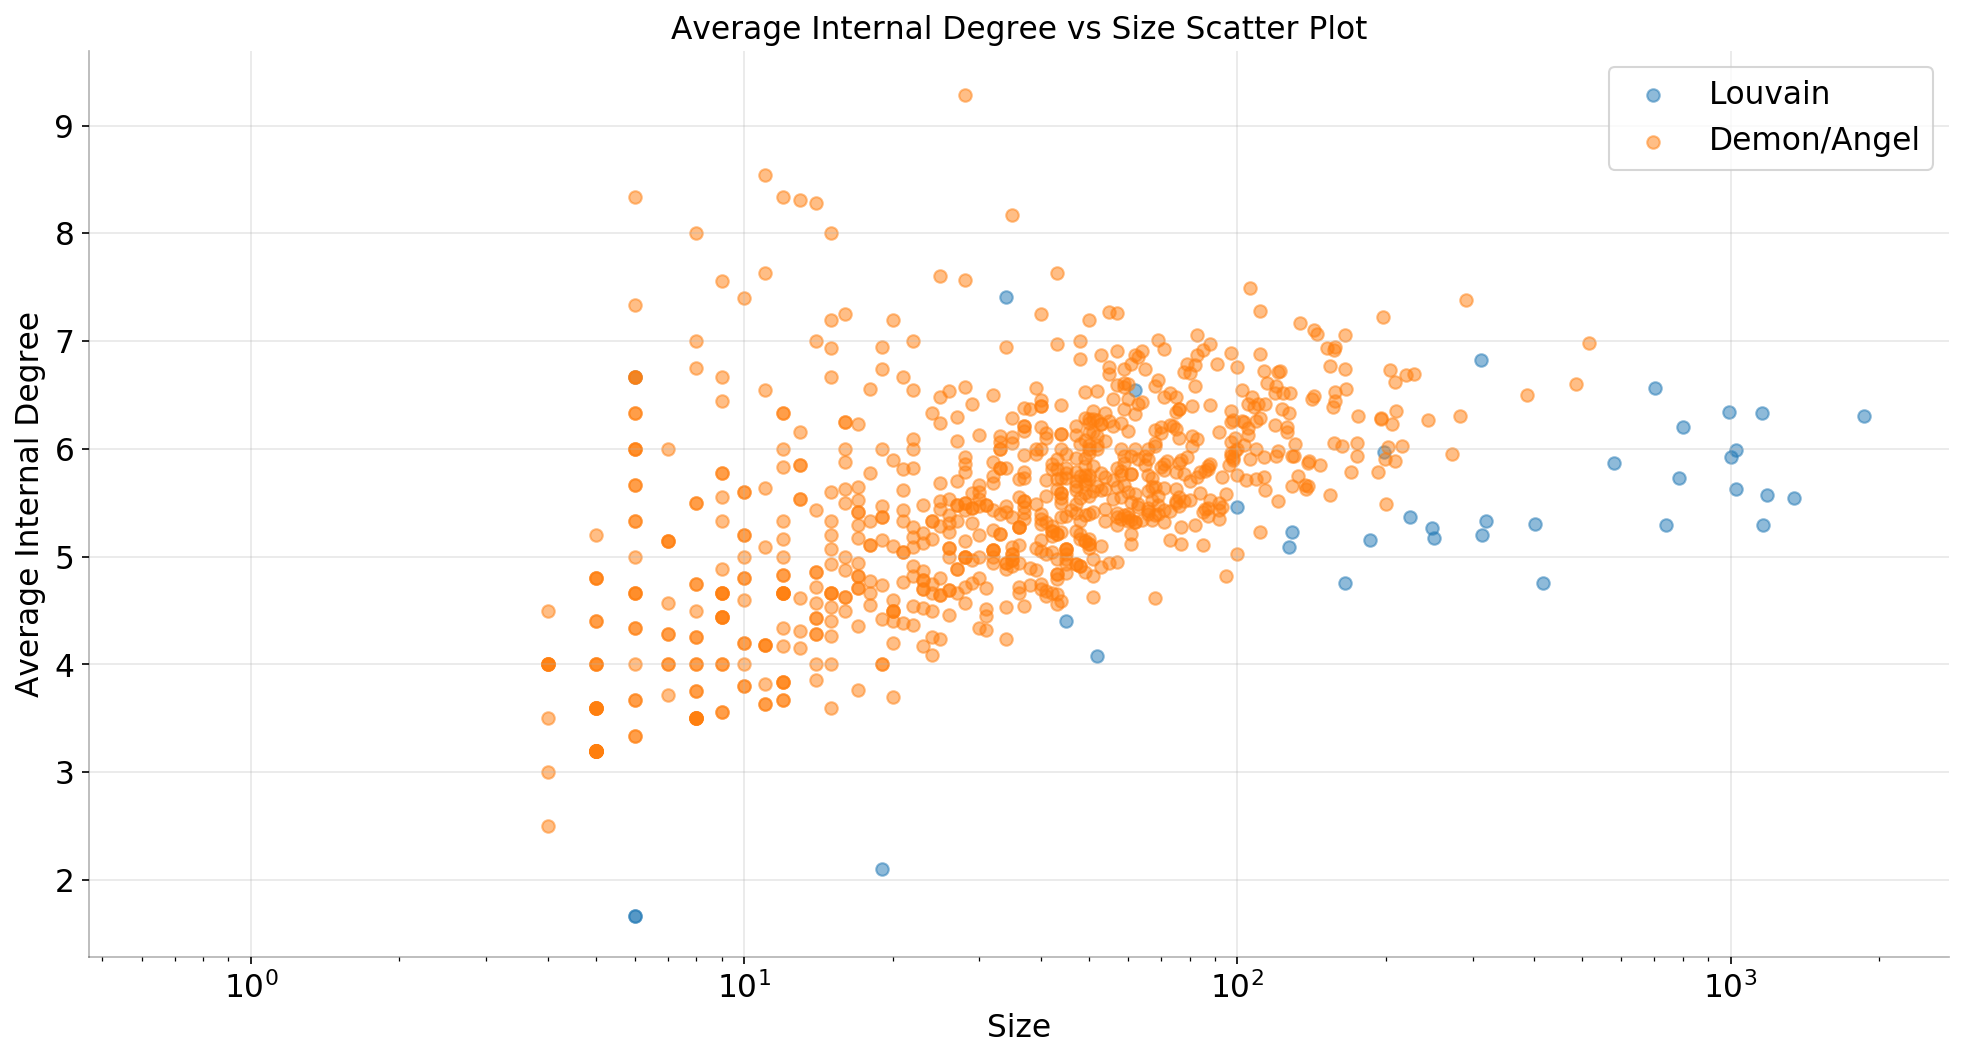

In [ ]:
avg_internal_deg_louvain_demon = [(louvain_size, louvain_avg_internal_deg, "Louvain"),
                       (demon_size, demon_avg_internal_deg, "Demon/Angel")]
scatter_plot(avg_internal_deg_louvain_demon, "Average Internal Degree vs Size")

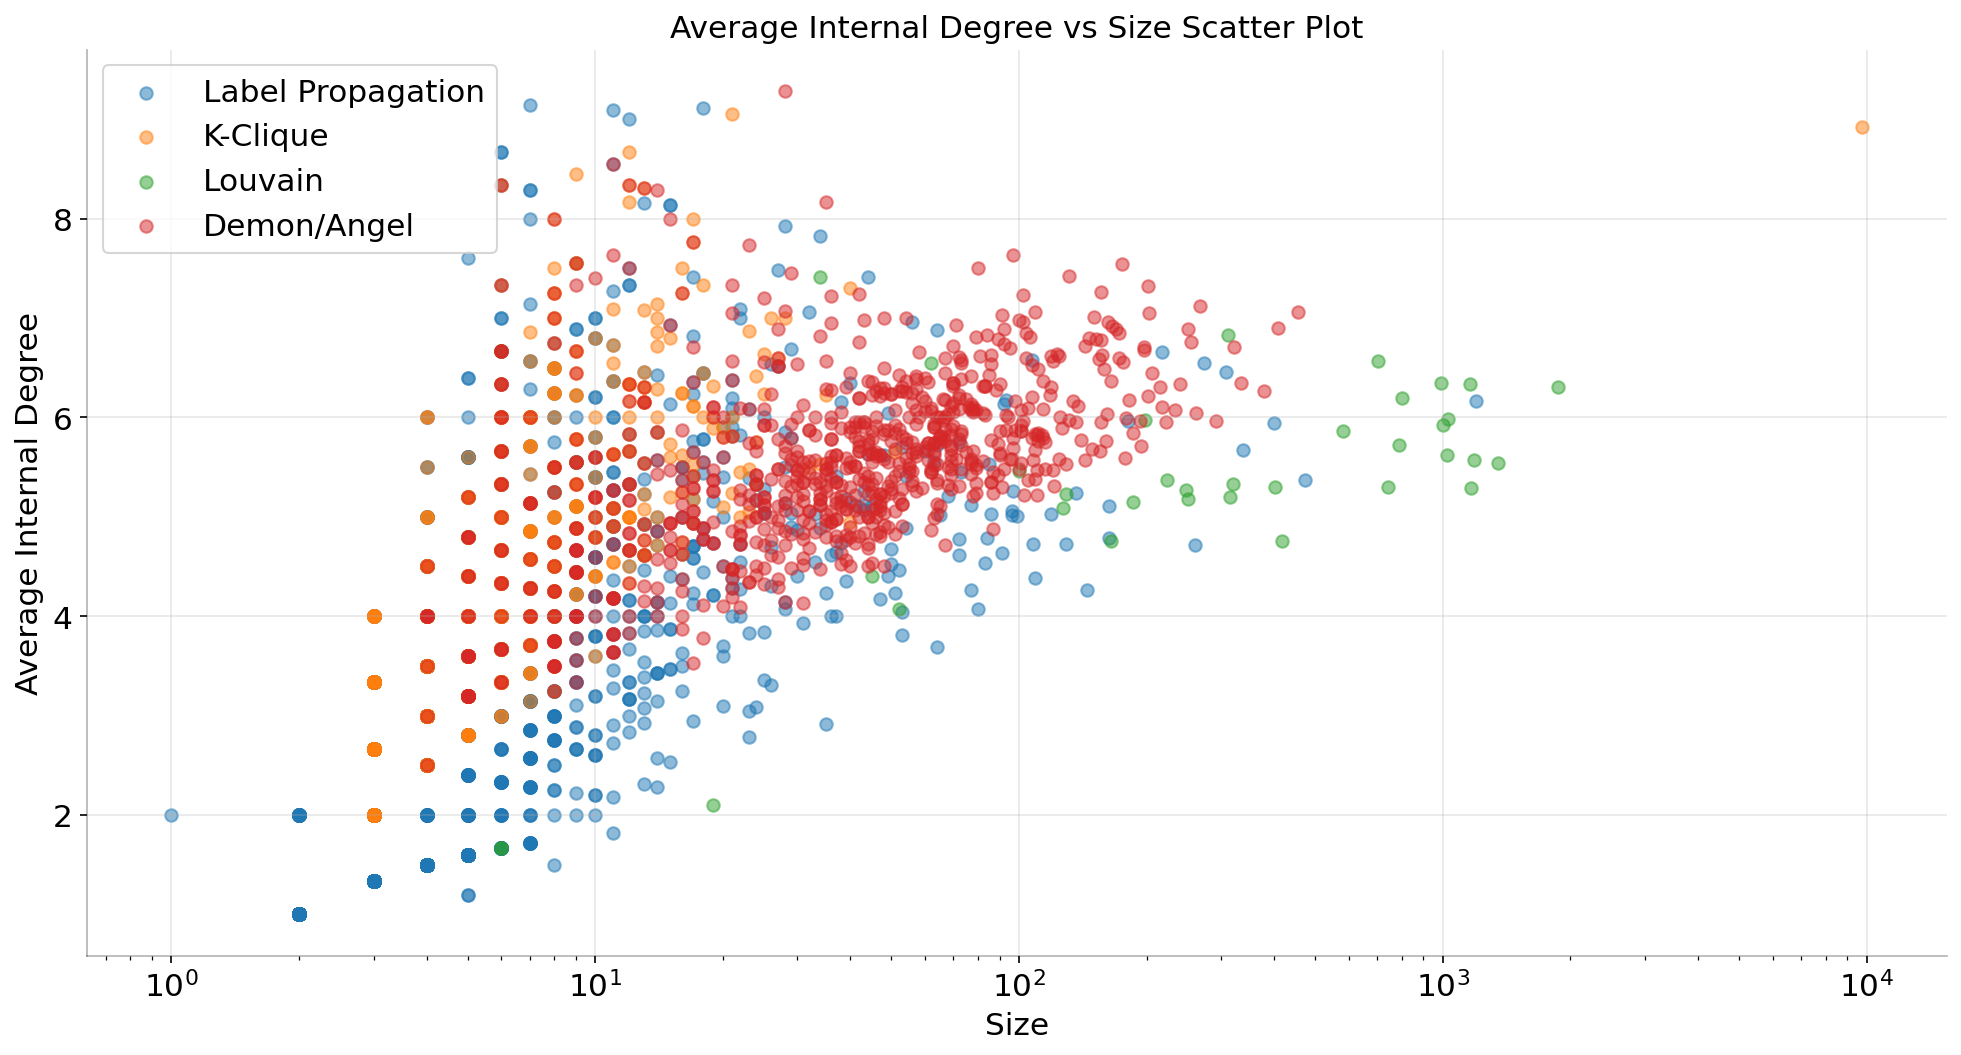

In [ ]:
avg_internal_deg_all = [(label_size, label_avg_internal_deg, "Label Propagation"),
                       (kclique_size, kclique_avg_internal_deg, "K-Clique"),
                       (louvain_size, louvain_avg_internal_deg, "Louvain"),
                       (demon_size, demon_avg_internal_deg, "Demon/Angel")]
scatter_plot(avg_internal_deg_all, "Average Internal Degree vs Size")

### Partition Comparisons

#### NMI

In [ ]:
evaluation.normalized_mutual_information(label_coms, louvain_coms)

C:\Users\Pouria\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


MatchingResult(score=0.5659215102276192, std=None)

#### NF1

Louvain vs Label Propagation

In [ ]:
evaluation.nf1(label_coms,louvain_coms)

MatchingResult(score=0.0006071474749973297, std=None)

Louvain vs Demon/Angel

In [ ]:
evaluation.nf1(louvain_coms, demon_coms)

MatchingResult(score=0.011977201257861636, std=None)

Louvain vs K-Clique

In [ ]:
evaluation.nf1(louvain_coms, kclique_coms)

MatchingResult(score=5.677167986536179e-05, std=None)

Label Propagation vs K-Clique

In [ ]:
evaluation.nf1(label_coms, kclique_coms)

MatchingResult(score=0.03994872741724559, std=None)

Label Propagation vs Demon/Angel

In [ ]:
evaluation.nf1(label_coms, demon_coms)

MatchingResult(score=0.05875476629811557, std=None)

Demon/Angel vs K-Clique

In [ ]:
evaluation.nf1(demon_coms, kclique_coms)

MatchingResult(score=0.02008743707495822, std=None)